In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Notations
- x_train: training example feature => x
- y_train: training example target => y
- x_i: ith training example feature
- y_i: ith training example target
- w,b: parameters
- m: the number of the training examples
- f_wb: the model => f_wb(x) = wx + b

$model:$
$$f_{w, b} = wx + b \tag{1}$$
$Cost function:$ $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [118]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array([250, 300, 480,  430,   630, 730,])
m = x_train.shape[0]

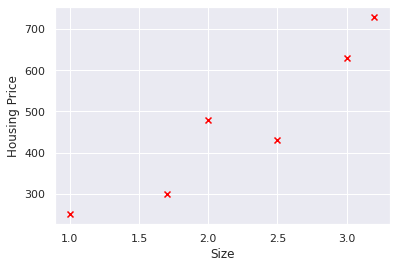

In [119]:
sns.set()
plt.scatter(x_train, y_train, marker='x', color='red')
plt.xlabel('Size')
plt.ylabel('Housing Price')
plt.show()

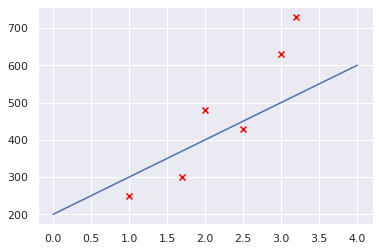

In [120]:
w = 100
b = 200
x = np.linspace(0, 4, 1000)
f_wb_plot = w*x + b

plt.scatter(x_train, y_train, marker='x', color='red')
plt.plot(x, f_wb_plot)
plt.show()

In [121]:
def compute_model_ouput(w, b, x_train, m):
    f_wb = np.zeros(m,)
    for i in range(0, m):
        f_wb[i] = w * x_train[i] + b
    return f_wb

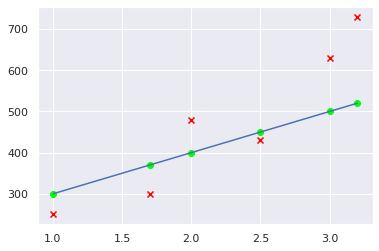

In [122]:
f_wb = compute_model_ouput(w=100, b=200, x_train=x_train, m=m)
plt.scatter(x_train, y_train, marker='x', color='red')
plt.plot(x_train, f_wb)
plt.scatter(x_train, f_wb, color='lime', label='model_ouputs')
plt.show()


In [180]:
# J(w, b) = (1/(2*m))*sum((f(x_i) - y_i)^2)
def compute_cost(w, b, m, y_train, f_wb):
    cost = 0
    for i in range(0, m):
        error = f_wb[i] - y_train[i]
        cost = cost + error ** 2
    return (1/(2*m)) * cost

In [183]:
w = 250
b = 150
compute_cost(w=w, b=b, m=m, y_train=y_train, 
                     f_wb=compute_model_ouput(w=w, b=b, x_train=x_train, m=m))

30612.5

Text(0, 0.5, 'B')

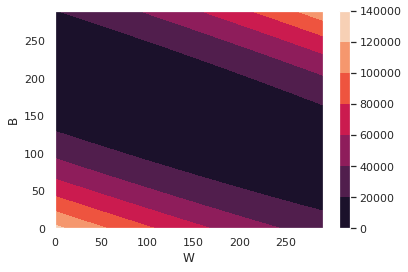

In [184]:
w = np.arange(0, 300, 10)
b = np.arange(0, 300, 10)
# Z = np.zeros((30, 30))
z = list()
for i in range(0, 300, 10):
    for j in range(0, 300, 10):
        
         z.append(compute_cost(w=i, b=j, m=m, y_train=y_train, 
                     f_wb=compute_model_ouput(w=i, b=j, x_train=x_train, m=m)))
Z = np.array(z).reshape(30, 30)
W, B = np.meshgrid(w, b)
fig,ax=plt.subplots(1,1)
cp = ax.contourf(W, B, Z)
plt.rcParams['axes.grid'] = False
plt.colorbar(cp)
plt.xlabel('W')
plt.ylabel('B')

In [217]:
def contour_plot_f(start, stop, step): 
    w = np.arange(start, stop, step)
    b = np.arange(start, stop, step)
    # Z = np.zeros((30, 30))
    z = list()
    for i in range(start, stop, step):
        for j in range(start, stop, step):

             z.append(compute_cost(w=i, b=j, m=m, y_train=y_train, 
                         f_wb=compute_model_ouput(w=i, b=j, x_train=x_train, m=m)))
    reshape_num = (stop - start) // step
    Z = np.array(z).reshape(reshape_num, reshape_num)
    W, B = np.meshgrid(w, b)
    fig,ax=plt.subplots(1,1)
    cp = ax.contourf(W, B, Z)
    plt.rcParams['axes.grid'] = False
    plt.colorbar(cp)
    plt.xlabel('W')
    plt.ylabel('B')

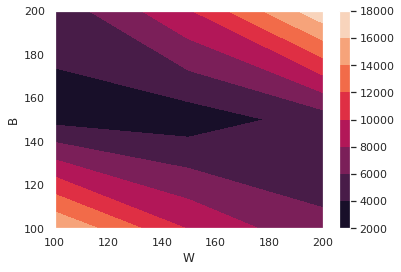

In [230]:
contour_plot_f(100, 250, 50)

In [228]:
# Second Method
# contour([X, Y,] Z, [levels], **kwargs)
def contour_plot(start, stop, step): 
    w = np.arange(start, stop, step)
    b = np.arange(start, stop, step)
    # Z = np.zeros((30, 30))
    z = list()
    for i in range(start, stop, step):
        for j in range(start, stop, step):

             z.append(compute_cost(w=i, b=j, m=m, y_train=y_train, 
                         f_wb=compute_model_ouput(w=i, b=j, x_train=x_train, m=m)))
    reshape_num = (stop - start) // step
    Z = np.array(z).reshape(reshape_num, reshape_num)

    plt.contour(w, b, Z)
    plt.colorbar()
    plt.xlabel('W')
    plt.ylabel('B')

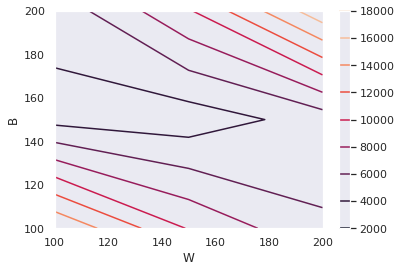

In [229]:
contour_plot(100, 250, 50)